In [1]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 2. Create a sample movie dataset
data = {
    "title": ["Inception", "Titanic", "Avengers", "Shrek", "Up", "Coco", "Joker", "Frozen", "Toy Story", "Tenet"],
    "genre": ["Sci-Fi", "Romance", "Action", "Animation", "Animation", "Animation", "Drama", "Animation", "Animation", "Sci-Fi"],
    "year": [2010, 1997, 2012, 2001, 2009, 2017, 2019, 2013, 1995, 2020],
    "rating": [8.8, 7.8, 8.1, 7.9, 8.3, 8.4, 8.5, 7.5, 8.3, 7.4],
    "votes": [2000000, 1100000, 1800000, 600000, 800000, 500000, 1000000, 700000, 900000, 400000]
}


In [3]:
# 3. Convert to DataFrame
df = pd.DataFrame(data)
df


,title,genre,year,rating,votes
0,Inception,Sci-Fi,2010,8.8,2000000
1,Titanic,Romance,1997,7.8,1100000
2,Avengers,Action,2012,8.1,1800000
3,Shrek,Animation,2001,7.9,600000
4,Up,Animation,2009,8.3,800000
5,Coco,Animation,2017,8.4,500000
6,Joker,Drama,2019,8.5,1000000
7,Frozen,Animation,2013,7.5,700000
8,Toy Story,Animation,1995,8.3,900000
9,Tenet,Sci-Fi,2020,7.4,400000


In [4]:
# 4. Check data types and info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   10 non-null     object 
 1   genre   10 non-null     object 
 2   year    10 non-null     int64  
 3   rating  10 non-null     float64
 4   votes   10 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 532.0+ bytes


In [5]:
# 5. Basic statistics
df.describe()


,year,rating,votes
count,10.00000,10.000000,1.000000e+01
mean,2009.30000,8.100000,9.800000e+05
std,8.90755,0.447214,5.329165e+05
min,1995.00000,7.400000,4.000000e+05
25%,2003.00000,7.825000,6.250000e+05
50%,2011.00000,8.200000,8.500000e+05
75%,2016.00000,8.375000,1.075000e+06
max,2020.00000,8.800000,2.000000e+06


In [6]:
# 6. Add a column for rating category
def rate_group(r):
    if r >= 8.5:
        return "Excellent"
    elif r >= 8.0:
        return "Good"
    elif r >= 7.5:
        return "Average"
    else:
        return "Below Average"

df["rating_group"] = df["rating"].apply(rate_group)


In [7]:
# 7. Count of each rating group
df["rating_group"].value_counts()


rating_group
Good             4
Average          3
Excellent        2
Below Average    1
Name: count, dtype: int64

In [8]:
# 8. Count of each genre
df["genre"].value_counts()


genre
Animation    5
Sci-Fi       2
Romance      1
Action       1
Drama        1
Name: count, dtype: int64

In [9]:
# 9. Top rated movie
df[df["rating"] == df["rating"].max()]


,title,genre,year,rating,votes,rating_group
0,Inception,Sci-Fi,2010,8.8,2000000,Excellent


In [10]:
# 10. Lowest rated movie
df[df["rating"] == df["rating"].min()]


,title,genre,year,rating,votes,rating_group
9,Tenet,Sci-Fi,2020,7.4,400000,Below Average


In [11]:
# 11. Filter animation movies
df[df["genre"] == "Animation"]


,title,genre,year,rating,votes,rating_group
3,Shrek,Animation,2001,7.9,600000,Average
4,Up,Animation,2009,8.3,800000,Good
5,Coco,Animation,2017,8.4,500000,Good
7,Frozen,Animation,2013,7.5,700000,Average
8,Toy Story,Animation,1995,8.3,900000,Good


In [12]:
# 12. Movies released after 2010
df[df["year"] > 2010]


,title,genre,year,rating,votes,rating_group
2,Avengers,Action,2012,8.1,1800000,Good
5,Coco,Animation,2017,8.4,500000,Good
6,Joker,Drama,2019,8.5,1000000,Excellent
7,Frozen,Animation,2013,7.5,700000,Average
9,Tenet,Sci-Fi,2020,7.4,400000,Below Average


In [13]:
# 13. Group by genre and average rating
df.groupby("genre")["rating"].mean()


genre
Action       8.10
Animation    8.08
Drama        8.50
Romance      7.80
Sci-Fi       8.10
Name: rating, dtype: float64

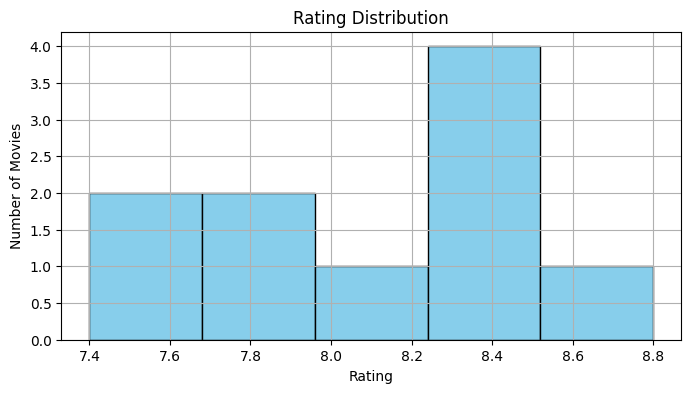

In [14]:
# 14. Visualization: Rating Distribution
plt.figure(figsize=(8, 4))
plt.hist(df["rating"], bins=5, color="skyblue", edgecolor="black")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()


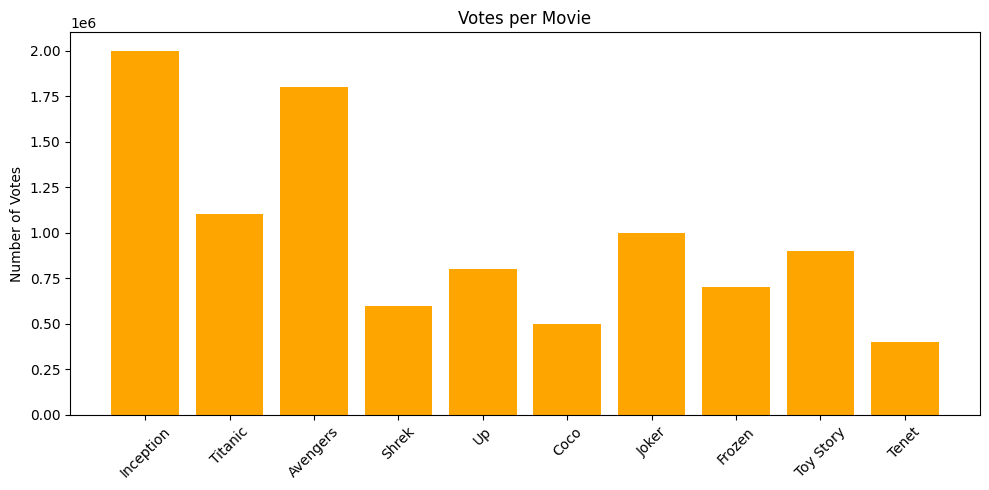

In [15]:
# 15. Bar chart: Votes per movie
plt.figure(figsize=(10, 5))
plt.bar(df["title"], df["votes"], color="orange")
plt.xticks(rotation=45)
plt.title("Votes per Movie")
plt.ylabel("Number of Votes")
plt.tight_layout()
plt.show()


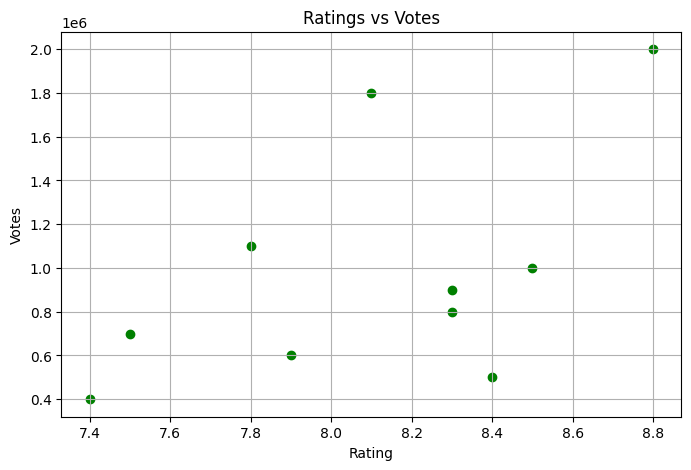

In [16]:
# 16. Scatter plot: Ratings vs Votes
plt.figure(figsize=(8, 5))
plt.scatter(df["rating"], df["votes"], color="green")
plt.title("Ratings vs Votes")
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.grid(True)
plt.show()
